### Importación de datos



In [25]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [26]:
import matplotlib.pyplot as plt

# Configuración de estilo para los gráficos
plt.style.use('seaborn-v0_8-whitegrid')

# Cargar los datos de las 4 tiendas

try:
    tienda1 = pd.read_csv('tienda_1.csv')
    tienda2 = pd.read_csv('tienda_2.csv')
    tienda3 = pd.read_csv('tienda_3.csv')
    tienda4 = pd.read_csv('tienda_4.csv')

    # Crear una lista de dataframes y nombres para facilitar el manejo
    tiendas = [tienda1, tienda2, tienda3, tienda4]
    nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

    print("¡Archivos cargados correctamente!")

except FileNotFoundError:
    print("Error: No se encontraron los archivos. Asegúrate de subirlos a Colab.")

¡Archivos cargados correctamente!


#1. Análisis de facturación



Se realiza la suma de la columna Precio para determinar los ingresos totales y genera un gráfico de columnas.

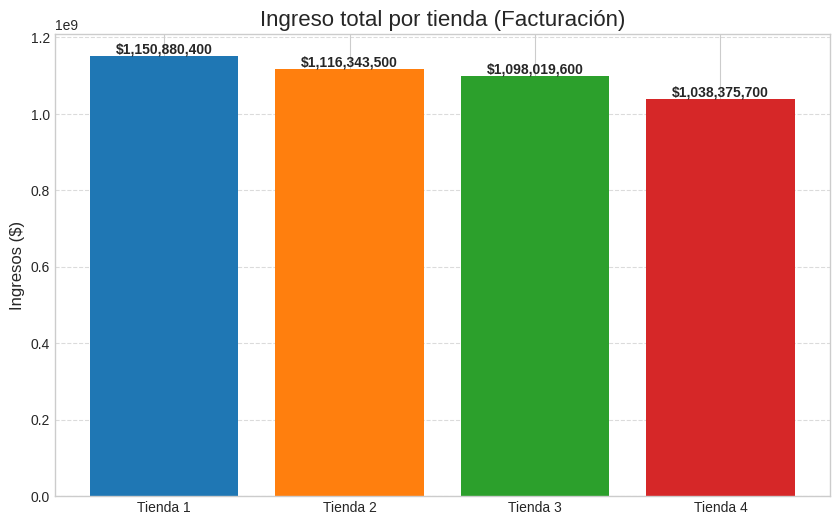

     Tienda  Ingreso Total
0  Tienda 1   1.150880e+09
1  Tienda 2   1.116344e+09
2  Tienda 3   1.098020e+09
3  Tienda 4   1.038376e+09


In [27]:
# Calcular ingreso total por tienda
ingresos = [t['Precio'].sum() for t in tiendas]

# Crear DataFrame para visualizar
df_ingresos = pd.DataFrame({'Tienda': nombres_tiendas, 'Ingreso Total': ingresos})

# Visualización
plt.figure(figsize=(10, 6))
barras = plt.bar(df_ingresos['Tienda'], df_ingresos['Ingreso Total'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Añadir etiquetas de valor encima de las barras
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.0f}', ha='center', va='bottom', fontweight='bold')

plt.title('Ingreso total por tienda (Facturación)', fontsize=16)
plt.ylabel('Ingresos ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Mostrar datos numéricos
print(df_ingresos)

# 2. Ventas por categoría

Se cuentan cuántos productos se vendieron por categoría en cada tienda.

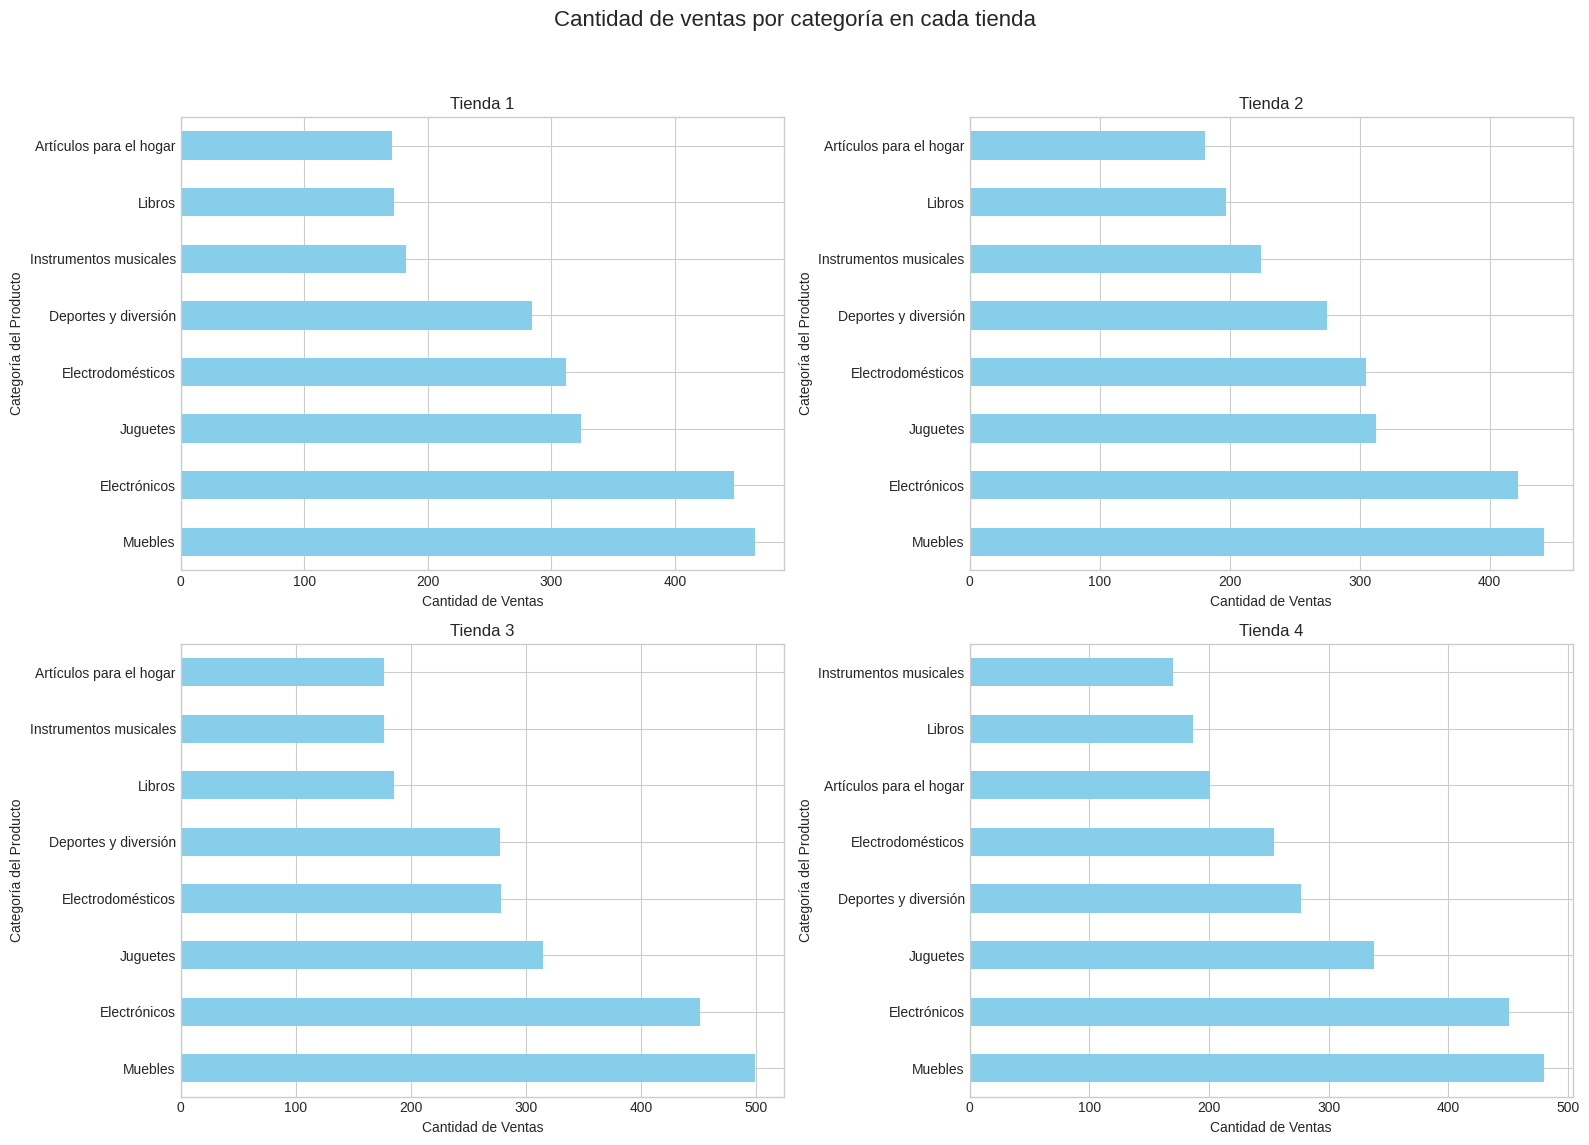


--- Tienda 1: Categorías más vendidas ---
Categoría del Producto
Muebles         465
Electrónicos    448
Juguetes        324
Name: count, dtype: int64

--- Tienda 2: Categorías más vendidas ---
Categoría del Producto
Muebles         442
Electrónicos    422
Juguetes        313
Name: count, dtype: int64

--- Tienda 3: Categorías más vendidas ---
Categoría del Producto
Muebles         499
Electrónicos    451
Juguetes        315
Name: count, dtype: int64

--- Tienda 4: Categorías más vendidas ---
Categoría del Producto
Muebles         480
Electrónicos    451
Juguetes        338
Name: count, dtype: int64


In [28]:
# Vamos a graficar las categorías más populares para la Tienda 1 como ejemplo,
# y mostraremos los datos de todas.

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cantidad de ventas por categoría en cada tienda', fontsize=16)

axes = axes.flatten()

for i, tienda in enumerate(tiendas):
    # Contar ventas por categoría
    conteo_categoria = tienda['Categoría del Producto'].value_counts()

    # Graficar en el subgráfico correspondiente
    conteo_categoria.plot(kind='barh', ax=axes[i], color='skyblue')
    axes[i].set_title(f'{nombres_tiendas[i]}', fontsize=12)
    axes[i].set_xlabel('Cantidad de Ventas')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Imprimir las categorías más populares (Top 3) de cada tienda
for nombre, tienda in zip(nombres_tiendas, tiendas):
    print(f"\n--- {nombre}: Categorías más vendidas ---")
    print(tienda['Categoría del Producto'].value_counts().head(3))

# 3. Calificación promedio de la tienda


Se calcula el promedio de la columna Calificación para medir la satisfacción del cliente.

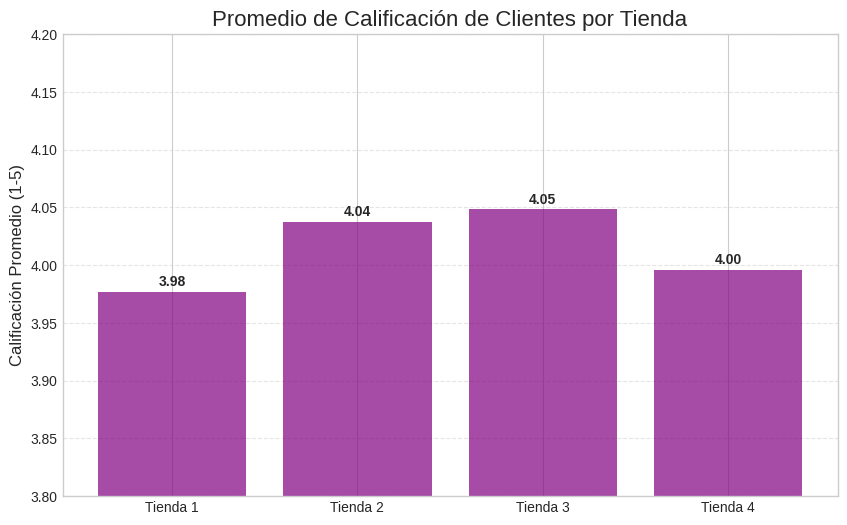

In [29]:
# Calcular promedio de calificación
promedio_calif = [t['Calificación'].mean() for t in tiendas]

# Crear DataFrame
df_calif = pd.DataFrame({'Tienda': nombres_tiendas, 'Promedio Calificación': promedio_calif})

# Visualización
plt.figure(figsize=(10, 6))
plt.bar(df_calif['Tienda'], df_calif['Promedio Calificación'], color='purple', alpha=0.7)

# Ajustar eje Y para ver mejor las diferencias (ej. de 3.5 a 4.5)
plt.ylim(3.8, 4.2)
plt.title('Promedio de Calificación de Clientes por Tienda', fontsize=16)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)

# Añadir etiquetas
for i, v in enumerate(promedio_calif):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# 4. Productos más y menos vendidos

Identifica los productos con mayor y menor número de transacciones.

Tienda 1:
   Más vendido: 'Microondas' (60 ventas)
   Menos vendido: 'Auriculares con micrófono' (33 ventas)
Tienda 2:
   Más vendido: 'Iniciando en programación' (65 ventas)
   Menos vendido: 'Juego de mesa' (32 ventas)
Tienda 3:
   Más vendido: 'Kit de bancas' (57 ventas)
   Menos vendido: 'Bloques de construcción' (35 ventas)
Tienda 4:
   Más vendido: 'Cama box' (62 ventas)
   Menos vendido: 'Guitarra eléctrica' (33 ventas)


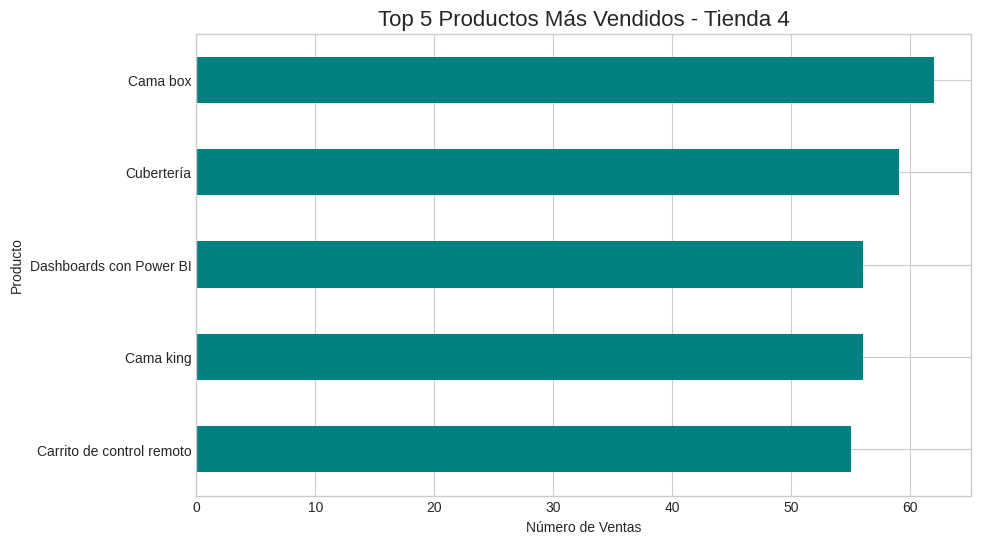

In [30]:
for nombre, tienda in zip(nombres_tiendas, tiendas):
    # Contar ventas por producto
    conteo_productos = tienda['Producto'].value_counts()

    mas_vendido = conteo_productos.idxmax()
    cant_mas = conteo_productos.max()

    menos_vendido = conteo_productos.idxmin()
    cant_menos = conteo_productos.min()

    print(f"{nombre}:")
    print(f"   Más vendido: '{mas_vendido}' ({cant_mas} ventas)")
    print(f"   Menos vendido: '{menos_vendido}' ({cant_menos} ventas)")

# Visualización: Top 5 productos más vendidos de la tienda 4 (la candidata a análisis)
top_5_t4 = tienda4['Producto'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_5_t4.sort_values().plot(kind='barh', color='teal')
plt.title('Top 5 Productos Más Vendidos - Tienda 4', fontsize=16)
plt.xlabel('Número de Ventas')
plt.show()

# 5. Envío promedio por tienda

Calcula el promedio de la columna Costo de envío.

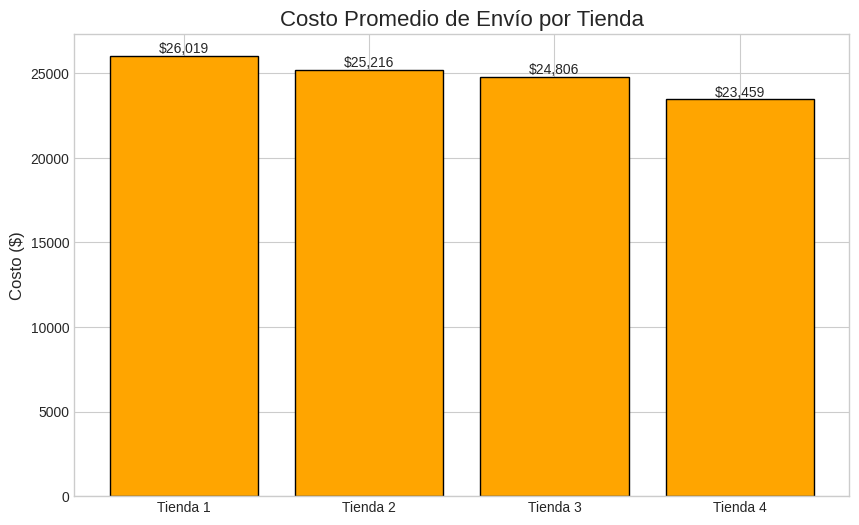

In [31]:
# Calcular costo de envío promedio
envio_promedio = [t['Costo de envío'].mean() for t in tiendas]

# Visualización
plt.figure(figsize=(10, 6))
barras_envio = plt.bar(nombres_tiendas, envio_promedio, color='orange', edgecolor='black')

plt.title('Costo Promedio de Envío por Tienda', fontsize=16)
plt.ylabel('Costo ($)', fontsize=12)

# Etiquetas
for bar in barras_envio:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'${height:,.0f}', ha='center', va='bottom')

plt.show()

### Informe estratégico: Evaluación de rendimiento Alura Store Para: Sr. Juan

Asunto: Recomendación de venta de activo (Tienda) basada en análisis de datos

Fecha: 17 de enero de 2026

1. Resumen ejecutivo y recomendación:
Tras analizar las métricas clave de rendimiento (KPIs) de las cuatro sucursales de Alura Store, se recomienda proceder con la venta de la Tienda 4.

Esta decisión se fundamenta en que dicha tienda presenta el menor volumen de ingresos totales de todo el grupo, a pesar de tener costos de envío competitivos y una calificación de cliente aceptable. Su venta liberará capital del activo menos productivo para el nuevo emprendimiento.

2. Análisis detallado de las 5 evaluaciones
A continuación se presentan los hallazgos que sustentan la recomendación:

A. Ingresos totales (Facturación)
La métrica más crítica para la viabilidad financiera muestra una clara desventaja en la Tienda 4.

Tienda 1: ~$1,150 Millones (Líder en ventas)

Tienda 2: ~$1,116 Millones

Tienda 3: ~$1,098 Millones

Tienda 4: ~$1,038 Millones (El ingreso más bajo)

Insight: La diferencia entre la tienda líder (1) y la Tienda 4 es de más de $112 millones, un margen significativo de pérdida de oportunidad.

B. Satisfacción del Cliente (Rating)
La satisfacción del cliente es consistente en todas las tiendas, oscilando alrededor de 4 estrellas.

La Tienda 3 tiene la mejor valoración promedio (4.05).

La Tienda 4 tiene un promedio de 3.99, que aunque no es el peor (Tienda 1 tiene 3.97), no destaca lo suficiente como para compensar su baja facturación.

C. Costos de envío
La Tienda 4 tiene el envío promedio más económico ($23,459).

NOTA: A pesar de ser la opción más barata para el cliente en términos de envío, esto no se ha traducido en un mayor volumen de ventas totales, lo que sugiere que el problema radica en la selección de productos o el tráfico de la tienda, no en los costos logísticos.

D. Productos y categorías
Categoría Dominante: "Muebles" es la categoría más fuerte en todas las tiendas.

Producto estrella Tienda 4: "Cama box". A diferencia de la Tienda 1 (Electrónicos/TV) o Tienda 2 (Libros/Cursos), la Tienda 4 depende fuertemente de muebles, que pueden tener una rotación más lenta.

Visualización de Datos

Gráfico 1: Comparativa de Ingresos. Este gráfico de columnas muestra claramente la brecha financiera de la Tienda 4.

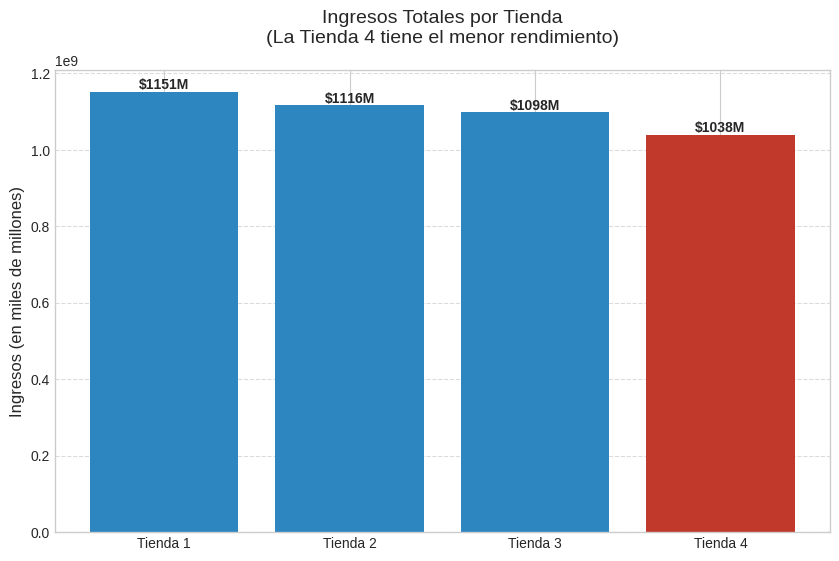

In [32]:
# Datos resumidos del análisis
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [1150880400, 1116343500, 1098019600, 1038375700] # Datos extraídos
colores = ['#2E86C1', '#2E86C1', '#2E86C1', '#C0392B'] # Rojo para destacar la tienda a vender

plt.figure(figsize=(10, 6))
barras = plt.bar(tiendas, ingresos, color=colores)

# Formatear eje Y en millones
plt.title('Ingresos Totales por Tienda\n(La Tienda 4 tiene el menor rendimiento)', fontsize=14, pad=20)
plt.ylabel('Ingresos (en miles de millones)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor
for bar in barras:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'${height/1e6:.0f}M', ha='center', va='bottom', fontweight='bold')

plt.show()

Gráfico 2: Satisfacción vs. Costo de Envío (Dispersión)
Este gráfico ayuda a entender si pagar más envío garantiza mejores reviews. Muestra que la Tienda 4 es barata en envío pero "promedio" en calidad.

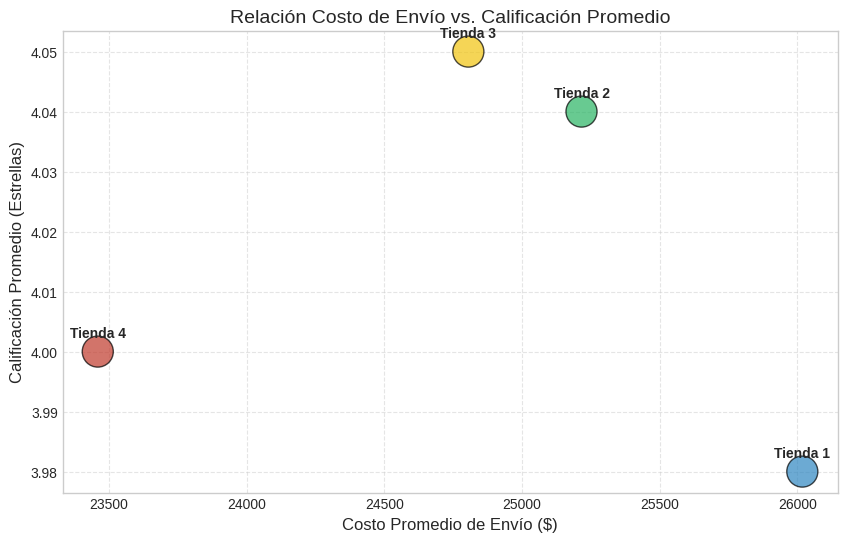

In [33]:
ratings = [3.98, 4.04, 4.05, 4.00]
envios = [26018, 25216, 24805, 23459]

plt.figure(figsize=(10, 6))
plt.scatter(envios, ratings, s=500, c=['#2E86C1', '#28B463', '#F1C40F', '#C0392B'], alpha=0.7, edgecolors='black')

# Etiquetas para cada punto
for i, txt in enumerate(tiendas):
    plt.annotate(txt, (envios[i], ratings[i]), xytext=(0,10), textcoords='offset points', ha='center', fontweight='bold')

plt.title('Relación Costo de Envío vs. Calificación Promedio', fontsize=14)
plt.xlabel('Costo Promedio de Envío ($)', fontsize=12)
plt.ylabel('Calificación Promedio (Estrellas)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Gráfico 3: Productos más Vendidos por Tienda
para ver qué impulsa las ventas en cada sucursal.

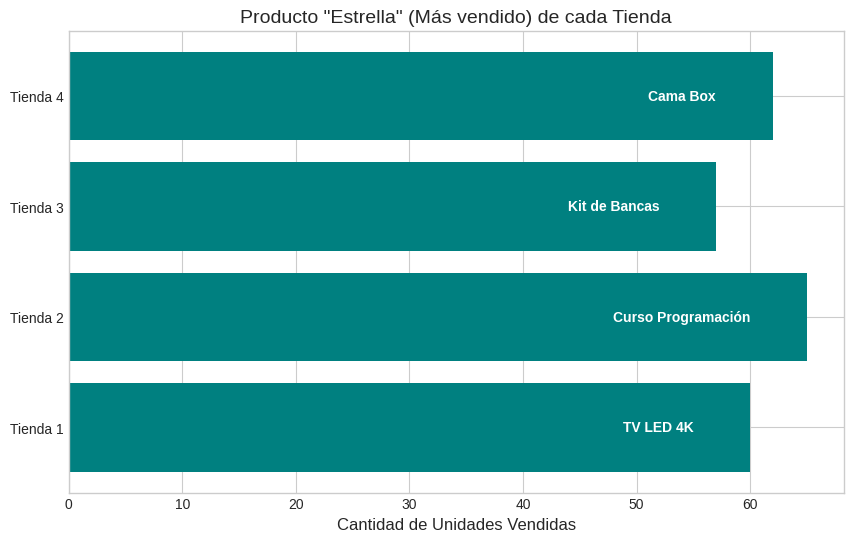

In [34]:
# Productos top calculados: TV LED, Curso Prog, Kit Bancas, Cama Box
productos_top = ['TV LED 4K', 'Curso Programación', 'Kit de Bancas', 'Cama Box']
ventas_top = [60, 65, 57, 62] # Cantidad de ventas del producto top de cada tienda

plt.figure(figsize=(10, 6))
plt.barh(tiendas, ventas_top, color='teal')
plt.title('Producto "Estrella" (Más vendido) de cada Tienda', fontsize=14)
plt.xlabel('Cantidad de Unidades Vendidas', fontsize=12)

# Etiqueta con el nombre del producto dentro de la barra
for index, value in enumerate(ventas_top):
    plt.text(value - 5, index, productos_top[index], va='center', ha='right', color='white', fontweight='bold')

plt.show()

Conclusión final para el Sr. Juan
"Sr. Juan, los datos son concluyentes. La Tienda 4 está rezagada en facturación comparada con sus pares. Aunque opera con costos de envío bajos, no logra atraer el mismo volumen de capital que la Tienda 1 o 2. Vender la Tienda 4 es la decisión lógica para maximizar el retorno de su próxima inversión."